In [1]:
import pandas as pd
import os

# Load the dataset
file_path = 'D:\\1 code AI'
file_names = ['new_data_v1.csv']
datasets = [pd.read_csv(os.path.join(file_path, file)) for file in file_names]
dataset = pd.concat(datasets, ignore_index=True)

# Count the number of labels 0 and 1
label_counts = dataset['Label'].value_counts()
print("Label counts:")
print(label_counts)

dataset.info()


Label counts:
Label
0    204368
1     34767
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239135 entries, 0 to 239134
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   row     239135 non-null  int64  
 1   col     239135 non-null  int64  
 2   year    239135 non-null  int64  
 3   month   239135 non-null  int64  
 4   day     239135 non-null  int64  
 5   hour    239135 non-null  int64  
 6   B04B    239135 non-null  float64
 7   B05B    239135 non-null  float64
 8   B06B    239135 non-null  float64
 9   B09B    239135 non-null  float64
 10  B10B    239135 non-null  float64
 11  B11B    239135 non-null  float64
 12  B12B    239135 non-null  float64
 13  B14B    239135 non-null  float64
 14  B16B    239135 non-null  float64
 15  I2B     239135 non-null  float64
 16  I4B     239135 non-null  float64
 17  IRB     239135 non-null  float64
 18  VSB     239135 non-null  float64
 19  WVB     239135 n

In [2]:
from sklearn.model_selection import train_test_split

# Check if columns exist before dropping
columns_drop = ["Label", "year", "month", "day", "hour"]
existing_columns_to_drop = [col for col in columns_drop if col in dataset.columns]

X = dataset.drop(columns=existing_columns_to_drop)
y = dataset["Label"]

print(X.head())
print(X.info())
print(y.head())
print(y.value_counts())

   row  col      B04B      B05B      B06B       B09B       B10B       B11B  \
0    0  114  0.084788  0.053601  0.030115  253.87752  261.63812  281.48710   
1    0  116  0.129801  0.103687  0.064551  253.48486  261.10180  279.65836   
2    0  118  0.088053  0.074731  0.043408  253.62572  261.10180  281.48782   
3    0  119  0.085429  0.070825  0.040283  253.06673  261.10593  280.73180   
4    0  122  0.099121  0.091174  0.057520  252.52501  260.70062  280.29822   

        B12B       B14B       B16B        I2B        I4B        IRB       VSB  \
0  260.33334  285.00070  269.99298  281.76694  286.36456  285.24005  0.070424   
1  259.01260  282.17892  268.44498  279.95640  286.18780  282.48993  0.099792   
2  260.33664  284.34457  269.33520  281.68080  286.60724  284.50903  0.070424   
3  259.73105  283.88354  269.33356  280.94617  285.77060  284.15130  0.074331   
4  259.61038  283.85870  268.99704  280.34543  287.78340  284.39117  0.082174   

         WVB  
0  244.27534  
1  244.05240  

In [3]:
# Split the data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print("Training set label distribution:")
print(y_train.value_counts())
print("Test set label distribution:")
print(y_test.value_counts())


Training set size: 191308
Test set size: 47827
Training set label distribution:
Label
0    163494
1     27814
Name: count, dtype: int64
Test set label distribution:
Label
0    40874
1     6953
Name: count, dtype: int64


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score


baserf = RandomForestClassifier(n_estimators=536, max_depth=50, min_samples_split=4, min_samples_leaf=4, max_features='log2', class_weight='balanced',random_state=42, n_jobs=-1)
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the RandomForestClassifier on the resampled training data
baserf.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred = baserf.predict(X_test)

# Evaluate the model
print("Classification Report:")
# Define the RepeatedStratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True , random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(baserf, X_train_res, y_train_res, cv=skf, scoring='f1', n_jobs=8)

print("Cross-validation scores:")
print(cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print(classification_report(y_test, y_pred))


Classification Report:
Cross-validation scores:
[0.73427452 0.72763274 0.71683787 0.72185235 0.7239182 ]
Mean cross-validation score: 0.7249031350656835
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     40874
           1       0.68      0.74      0.71      6953

    accuracy                           0.91     47827
   macro avg       0.82      0.84      0.83     47827
weighted avg       0.91      0.91      0.91     47827



Confusion Matrix:
[[39413  1446]
 [ 2775  4193]]
Confusion Matrix:
 [[39413  1446]
 [ 2775  4193]]


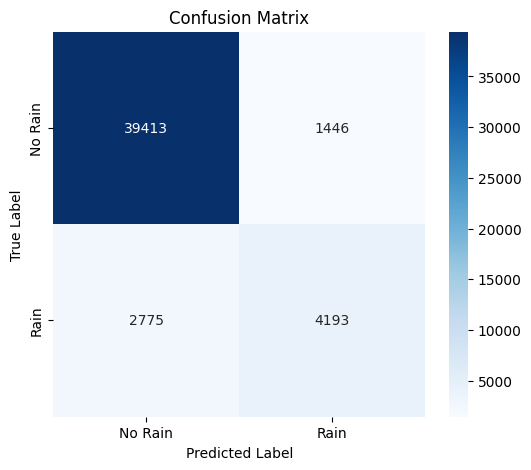

In [8]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()